# Inference with Pretrained Models in PyTorch
PyData Los Angeles 2019 Tutorial

### Introduction
This notebook shows how to make predictions with pretrained CV models in PyTorch.

The Google Colab version of this notebook is available here:
https://colab.research.google.com/github/danieljbrooks/PyTorchTutorial/blob/master/2.%20Inference%20with%20pretrained%20models%20in%20PyTorch.ipynb

In [0]:
from PIL import Image

import torch
import torchvision
import torchvision.models as models

In [5]:
#Download the image if necessary (for colab)
#!wget "https://github.com/danieljbrooks/PyTorchTutorial/blob/master/sample.jpg?raw=true"
#!mv 'sample.jpg?raw=true' sample.jpg

### Load image.

torch.Size([1, 3, 576, 768])


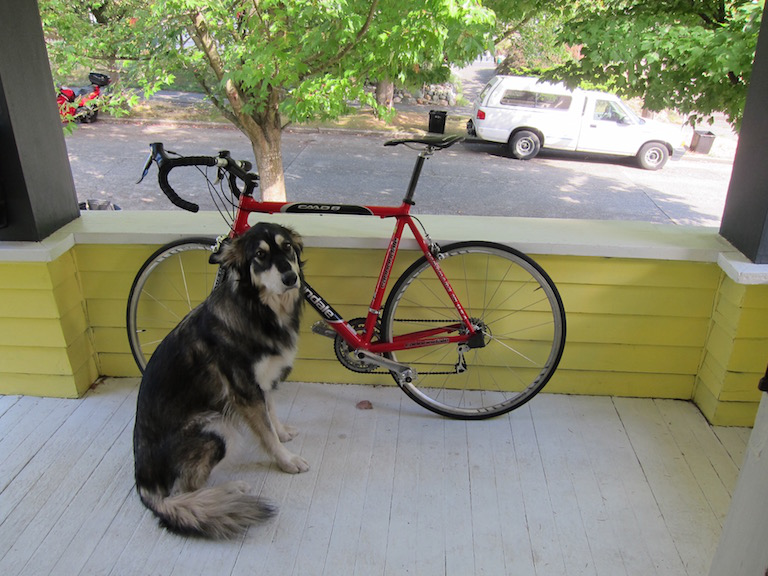

In [3]:
im = Image.open('./sample.jpg')
image_tensor = torchvision.transforms.ToTensor()(im).unsqueeze(0)

print(image_tensor.shape)
display(im)

### COCO Category Names
COCO is a popular dataset with 80 image categories. For readability, they are included here. 

In [0]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

### Object Detection and Segmentation with Mask RCNN

In [5]:
maskrcnn = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True).eval()
maskrcnn_prediction = maskrcnn(image_tensor)[0]
maskrcnn_prediction["names"] = [COCO_INSTANCE_CATEGORY_NAMES[n] for n in maskrcnn_prediction["labels"]] # For readability. 
display(maskrcnn_prediction)

{'boxes': tensor([[130.3548, 225.2348, 319.2139, 534.0630],
         [163.9418, 104.6611, 569.6259, 448.8582],
         [127.8332, 139.3069, 276.7411, 383.4668],
         [127.2100, 236.5892, 223.8053, 375.6145],
         [472.1641,  78.3381, 679.2084, 170.3702],
         [467.7302,  82.8349, 678.6873, 167.9351],
         [711.1240,  28.9951, 760.3258, 244.1435],
         [132.9807, 123.6327, 407.8713, 421.1846],
         [126.9707, 132.2350, 435.2205, 404.7831],
         [676.1549,  98.4204, 718.8041, 155.5283],
         [ 60.2948,  83.4726, 103.8111, 124.8873],
         [599.2211, 105.8284, 619.7384, 122.4207],
         [134.1478, 214.9231, 322.6755, 536.4111],
         [ 55.7405,  86.7579,  84.3506, 135.2860],
         [ 58.2811,  85.3906, 103.4364, 127.3297],
         [600.7007, 107.6795, 613.7570, 120.5460],
         [718.4214,  28.5830, 766.2003, 269.6244],
         [124.7943, 138.5707, 590.8885, 513.7618],
         [238.6042, 180.5955, 575.4844, 418.9373],
         [681.9163,  3